<a href="https://www.kaggle.com/code/jacker01/british-airways-task-1?scriptVersionId=148325726" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Task 1

For this task i am required to scrape customer reviews on british airways from <a href='https://www.airlinequality.com'>Skytrax</a>,clean it and analyse the data (sentiment analysis and word clouds were suggested)

## Scraping data from Skytrax
We can find customer reviews on the airline<a href='https://www.airlinequality.com/airline-reviews/british-airways'>here</a>.
I use beautiful soup to extract it

Importing libraries.............

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

This script extracts 1500 reviews from the website

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40 
page_size = 100 #How many reviews we intend to scrape per page
reviews = [] #list to hold all our reviews


max_retries = 7 #How many times we wan't our script to try scrape the data [ poor network problems :( ]

for i in range(1, pages + 1):
    print(f"Currently scraping page {i}") #Let's me know my script actually works and how far it's gone

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    retries = 0  # Initialize the retry counter

    while retries < max_retries: #retries till it has made 7 attempts
        try:
            
            response = requests.get(url)

            # Check if the response status code is 200 (OK)
            if response.status_code == 200:
        
                content = response.content
                soup = BeautifulSoup(content, 'html.parser') #Creating the soup that contains all our text

                for para in soup.find_all("div", {"class": "text_content"}):
                    reviews.append(para.get_text()) #appends the reviews we find into a reviews list

                print(f"   ---> {len(reviews)} total reviews") #tells me how many reviews i have so far
                break  # Exit the retry loop if successful

        except requests.exceptions.RequestException as e:
            print(f"Error retrieving page {i} - Retry {retries + 1}: {e}")

        # Increment the retry counter
        retries += 1 #increases the number of tries

    if retries == max_retries: #to let me know my network is terrible or the website has issues
        print(f"Failed to retrieve page {i} after {max_retries} retries.") 


Currently scraping page 1
   ---> 100 total reviews
Currently scraping page 2
   ---> 200 total reviews
Currently scraping page 3
   ---> 300 total reviews
Currently scraping page 4
   ---> 400 total reviews
Currently scraping page 5
   ---> 500 total reviews
Currently scraping page 6
   ---> 600 total reviews
Currently scraping page 7
   ---> 700 total reviews
Currently scraping page 8
   ---> 800 total reviews
Currently scraping page 9
   ---> 900 total reviews
Currently scraping page 10
   ---> 1000 total reviews
Currently scraping page 11
   ---> 1100 total reviews
Currently scraping page 12
   ---> 1200 total reviews
Currently scraping page 13
   ---> 1300 total reviews
Currently scraping page 14
   ---> 1400 total reviews
Currently scraping page 15
   ---> 1500 total reviews
Currently scraping page 16
   ---> 1600 total reviews
Currently scraping page 17
   ---> 1700 total reviews
Currently scraping page 18
   ---> 1800 total reviews
Currently scraping page 19
   ---> 1900 total 

we were able to extract all 3688 reviews on the airline from the site

Now to load the data into a pandas dataframe.............

In [4]:
df = pd.DataFrame({'Reviews': reviews})
df.head()

,Reviews
0,✅ Trip Verified | First time flying British Ai...
1,Not Verified | I flew London to Cairo and ret...
2,Not Verified | Absolutely the worst experienc...
3,Not Verified | Flew back from Malta after sc...
4,Not Verified | Cabin luggage had to go to carg...


We notice the reviews have verified or not verified before hand, this is uneccesary, so to remove it...........

In [5]:
df['Reviews'] = df['Reviews'].str.split('|',expand=True)[1] 
#Splits the text in each row and selects the second split only
display(df.head())

,Reviews
0,First time flying British Airways and I would...
1,I flew London to Cairo and return in October...
2,Absolutely the worst experience ever. Flew ...
3,Flew back from Malta after scattering our s...
4,"Cabin luggage had to go to cargo, even when I..."


looking good

let's save our reviews into a csv

In [6]:
df.to_csv('British airways customer reviews.csv')

Our data is cleaned and saved next we want to perform sentiment analysis

## Sentiment analysis using NLTK's VADER

In [7]:
import nltk
from tqdm.notebook import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
sia = SentimentIntensityAnalyzer() #initializing vader
res = {}
for i, row in tqdm(df.iterrows()):
    text = str(row['Reviews']) #extracts the text from the dataframe
    res[i] = sia.polarity_scores(text)  # computes the sentiment score for each text

0it [00:00, ?it/s]

In [9]:
analyzed = pd.DataFrame(res).T #turns the dictionary containing sentiment analysis results into a datfra,e
analyzed = pd.concat([df,analyzed],axis=1) #merges the reviews with the results
analyzed.head()

,Reviews,neg,neu,pos,compound
0,First time flying British Airways and I would...,0.000,0.577,0.423,0.9613
1,I flew London to Cairo and return in October...,0.073,0.725,0.202,0.9690
2,Absolutely the worst experience ever. Flew ...,0.215,0.763,0.022,-0.9903
3,Flew back from Malta after scattering our s...,0.041,0.748,0.211,0.9628
4,"Cabin luggage had to go to cargo, even when I...",0.047,0.809,0.144,0.6786


In [10]:
(analyzed['compound'].sum() / len(analyzed['compound'])) #computing general average sentiment

0.04149422451193058

**We can see the average compound score is 0.0415 which indicates a slightly positive sentiment**

In [11]:
# Defining thresholds for classification
negative_threshold = -0.1  
positive_threshold = 0.1

# Create a new column 'sentiment' based on the thresholds
analyzed['sentiment'] = analyzed['compound'].apply(lambda score: #creating a function to classify each review and create 
    'negative' if score < negative_threshold                     # a new column to store the results
    else ('neutral' if negative_threshold <= score <= positive_threshold else 'positive'))

In [12]:
analyzed.head()

,Reviews,neg,neu,pos,compound,sentiment
0,First time flying British Airways and I would...,0.000,0.577,0.423,0.9613,positive
1,I flew London to Cairo and return in October...,0.073,0.725,0.202,0.9690,positive
2,Absolutely the worst experience ever. Flew ...,0.215,0.763,0.022,-0.9903,negative
3,Flew back from Malta after scattering our s...,0.041,0.748,0.211,0.9628,positive
4,"Cabin luggage had to go to cargo, even when I...",0.047,0.809,0.144,0.6786,positive


In [13]:
analyzed['sentiment'].value_counts()

sentiment
neutral     1585
positive    1120
negative     983
Name: count, dtype: int64

We can see most of our reviews are neutral

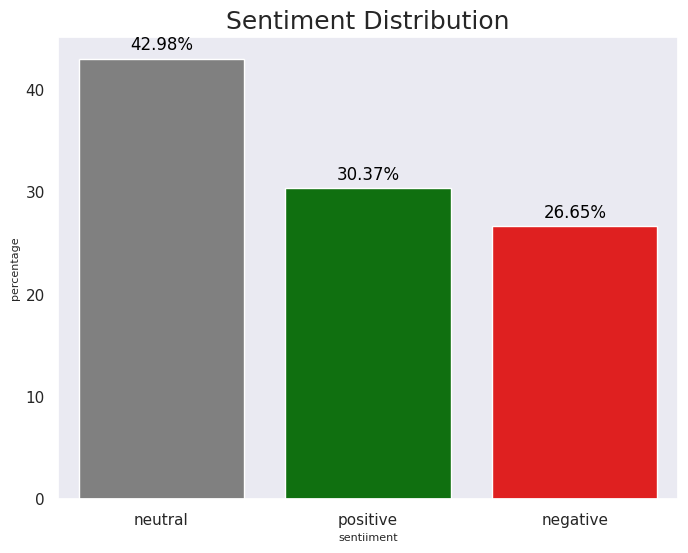

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="dark")
plt.figure(figsize=(8, 6))

# Calculate the percentage of each sentiment category over the total count
sentiment_counts = analyzed['sentiment'].value_counts()
percentage_counts = (sentiment_counts / sentiment_counts.sum()) * 100

# Create the bar plot
ax = sns.barplot(x=percentage_counts.index, y=percentage_counts, palette=["grey", "green", "red"])

# Add annotations with percentages
for p, percentage in zip(ax.patches, percentage_counts):
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.title("Sentiment Distribution",fontsize=18)
plt.ylabel("percentage",fontsize=8)
plt.xlabel("sentiiment",fontsize=8)
plt.savefig('sentiment_distribution.png')
plt.show()


We can see <strong>**42.98%**</strong> of reviews were neutral with <strong><font color='green'>30.37%</font>
</strong> being positive and <strong><font color='red'>26.65%</font></strong> negative.


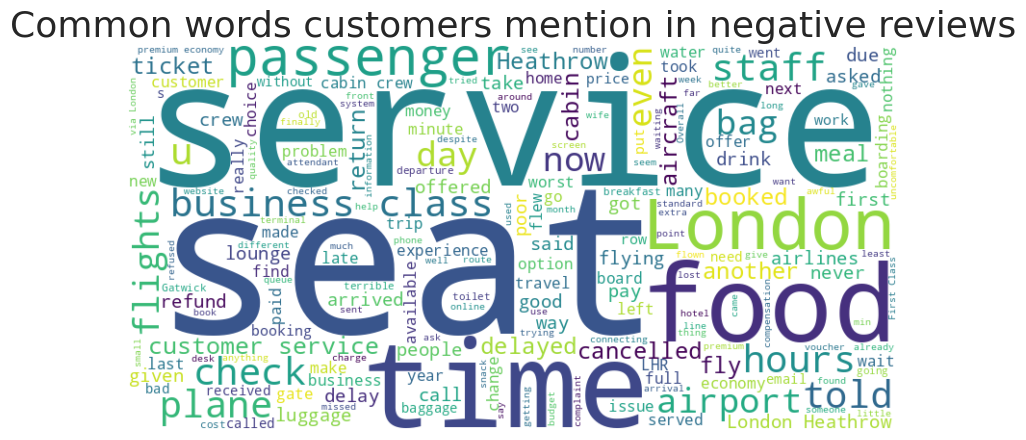

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Filtering the DataFrame to get only the negative sentiment reviews
negative = analyzed[analyzed['sentiment'] == 'negative']

# Combining the text from the negative sentiment reviews into a single string
negative_text = " ".join(negative['Reviews'])

# Defining a list of custom stopwords
custom_stopwords = ['BA','British','Airway','hour','back','one','will','flight','Airways','airline']

# Merging the custom stopwords with the default stopwords provided by the library
merged_stopwords = set(STOPWORDS) | set(custom_stopwords)

# Create=ing a WordCloud object and setting the merged stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=merged_stopwords).generate(negative_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common words customers mention in negative reviews',fontsize=26)
wordcloud.to_file("negative_wordcloud.png")
plt.show()

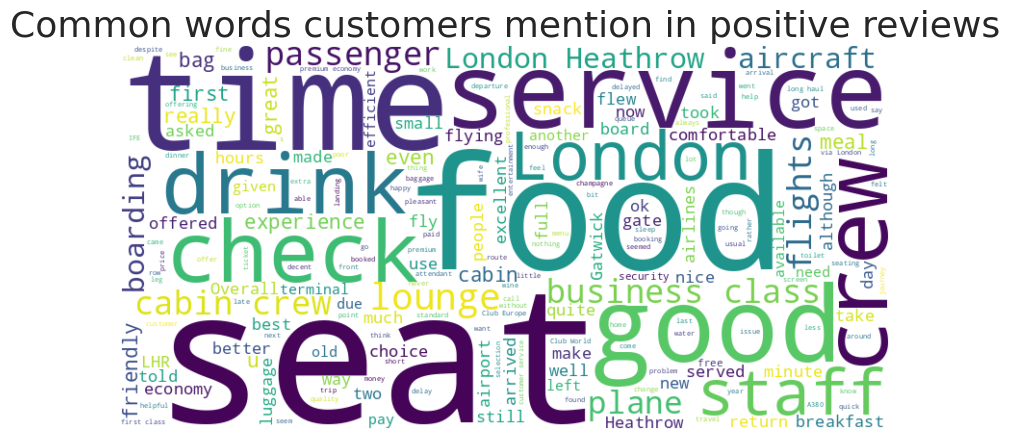

In [16]:
# Filtering the DataFrame to get only the positivetive sentiment reviews
positive = analyzed[analyzed['sentiment'] == 'positive']


positive_text = " ".join(positive['Reviews'])

# Defining a list of custom stopwords
custom_stopwords = ['BA','British','Airway','hour','back','one','will','flight','Airways','airline']

# Merging the custom stopwords with the default stopwords provided by the library
merged_stopwords = set(STOPWORDS) | set(custom_stopwords)

# Creating a WordCloud object and setting the merged stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=merged_stopwords).generate(positive_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common words customers mention in positive reviews',fontsize=26)
wordcloud.to_file("positive_wordcloud.png")
plt.show()